### Exemplo: perfis verticais

Arquivos com temperatura e salinidade climatológica do World Ocean Atlas (WOA) serão fornecidos para uma região específica do litoral Norte de São Paulo: Ubatuba. Iremos, então:

- carregar os dados com numpy usando o método loadtxt(sep=','), sendo uma variável para cada p ropriedade

temperatura = np.loadtxt('../dados/salinidade_woa2018_ubatuba_60m.csv', delimiter=',')

- explorar a estrutura da matriz que virá. Por exemplo, identificar:
    - o que é cada coluna? E cada linha?
    - como acessá-los pelo indexamento de matrizes?
 
Uma vez familiarizados com a matriz, prosseguiremos para algumas visualizações com o matplotlib.

In [13]:
# codigo para baixar o arquivo, caso você esteja rodando este notebook no Google Colab
!wget --directory-prefix=../Dados/ https://raw.githubusercontent.com/LuizaPS/MinicursoPython_AbmGeo/main/Dados/temperatura_woa2018_ubatuba_60m.csv
!wget --directory-prefix=../Dados/ https://raw.githubusercontent.com/LuizaPS/MinicursoPython_AbmGeo/main/Dados/salinidade_woa2018_ubatuba_60m.csv

--2021-11-24 14:57:10--  https://raw.githubusercontent.com/LuizaPS/MinicursoPython_AbmGeo/main/Dados/temperatura_woa2018_ubatuba_60m.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 404 Not Found
2021-11-24 14:57:11 ERRO 404: Not Found.

--2021-11-24 14:57:11--  https://raw.githubusercontent.com/LuizaPS/MinicursoPython_AbmGeo/main/Dados/salinidade_woa2018_ubatuba_60m.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 404 Not Found
2021-11-24 14:57:11 ERRO 404: Not Found.



In [2]:
# primeiro importamos os pacotes que iremos usar neste script
import numpy as np
import matplotlib.pyplot as plt
# magic-word para visualizar as imagens no notebook
%matplotlib inline

In [3]:

# ---- definindo funções que nos ajudarão ---- #
def carregar_climatologia(fname):
    """ 
    Função para ler um arquivo csv com o numpy.loadtxt e retornar a matriz para o código principal 
    
    parameters
    ----------
    fname: str
        Nome do arquivo a ser lido.
        
    returns
    ----------
    climatologia : np.ndarray
    """
    
    climatologia = np.loadtxt(fname, delimiter=',')
    
    return climatologia


In [10]:
# ---- começo do código principal ---- #

# carregando as matrizes de temperatura e salinidade
temperatura = carregar_climatologia('../dados/temperatura_woa2018_ubatuba_60m.csv')
salinidade  = carregar_climatologia('../dados/salinidade_woa2018_ubatuba_60m.csv')

# extraindo a matriz (1D) de profundidades
profundidade = temperatura[:,0]
profundidade

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.])

In [12]:
# ---- determinando algumas configurações padrões da nossa figura ---- #

# criando uma lista de cores, com variações de cinza, no padrão RGB (red,green,blue)
colors = [(i/2., i/2., i/2.) for i in np.arange(0.,2., 0.18)]

# criando uma lista dos nomes dos meses para gerar legenda
labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

temperatura.shape

(12, 13)

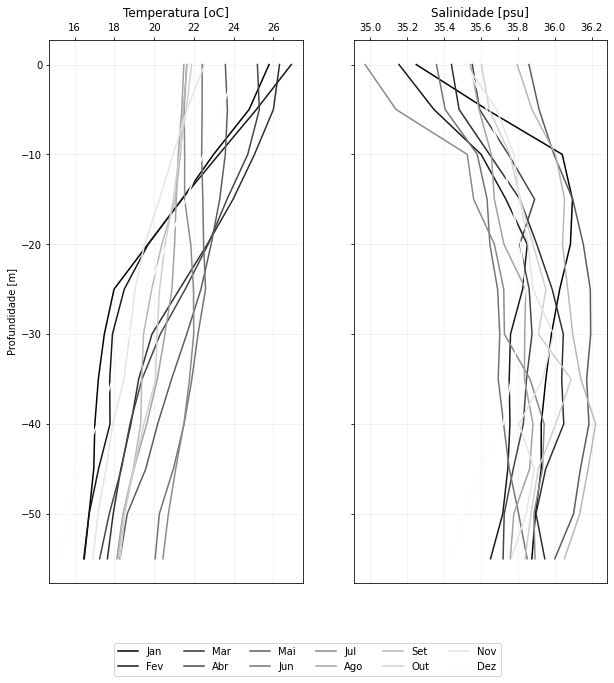

In [8]:


# ---- criando a visualização de dados que queremos ---- #
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,10))

# loop no número dos meses. Começamos em 1 pois o 0 é a profundidade na nossa matriz
for mes in np.arange(1,13,1):
    # extraindo cor e nome do mês
    color = colors[mes-1]
    nome_mes = labels[mes-1]
    
    # extraindo propriedades hidrográficas
    T,S = temperatura[:, mes], salinidade[:, mes]
    
    # plotando nos subplots
    axes[0].plot(T, -profundidade, c=color, label=nome_mes)
    axes[1].plot(S, -profundidade, c=color, label=nome_mes)

# adicionando titulos para cada subplot
axes[0].set_title('Temperatura [oC]')
axes[1].set_title('Salinidade [psu]')
axes[0].set_ylabel('Profundidade [m]')

# eixo x no topo
# for ax in axes:
#     ax.xaxis.tick_top()
_ = [ax.xaxis.tick_top() for ax in axes]

# adicionando gradeamento
_ = [ax.grid('--', alpha=.2) for ax in axes]
# adicionando legenda
plt.legend(ncol=6, bbox_to_anchor=(.6, -.1))
plt.savefig('lec03_exercicion3.png', bbox_to_inches='tight')